# Calculating the Pumps efficency curves 

Byrjum á Vatnsenda neðra kerfi

In [423]:
import matplotlib.pyplot as plt
import pandas as pd

In [424]:
start_date = '2024-04'
end_date = '2024-07'


## Pressure in mH20

In [425]:
Vatnsendi_nedri_pressure = pd.read_excel('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/data/H-KOP-VE-ÞS213.xlsx')
Vatnsendi_nedri_pressure.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
Vatnsendi_nedri_pressure['start_time'] = pd.to_datetime(Vatnsendi_nedri_pressure['start_time'], errors='coerce')
Vatnsendi_nedri_pressure.set_index('start_time',inplace=True)
Vatnsendi_nedri_pressure = Vatnsendi_nedri_pressure.sort_index(ascending=True)

Vatnsendi_nedri_pressure_2024 = Vatnsendi_nedri_pressure.loc['2024']
Vatnsendi_nedri_pressure_2024 = Vatnsendi_nedri_pressure_2024.copy()
Vatnsendi_nedri_pressure_2024.rename(columns={"value":"mH20"},inplace=True)
Vatnsendi_nedri_pressure_2024["mH20"] = Vatnsendi_nedri_pressure_2024['mH20']* 10.197
Vatnsendi_nedri_pressure_2024 = Vatnsendi_nedri_pressure_2024.drop('2024-08-21 01:00:00') # Drop the outlier
Vatnsendi_nedri_pressure_2024.head()


,mH20
start_time,
2024-01-01 01:00:00,57.10320
2024-01-01 02:00:00,57.10320
2024-01-01 03:00:00,56.89926
2024-01-01 04:00:00,56.59335
2024-01-01 05:00:00,56.38941


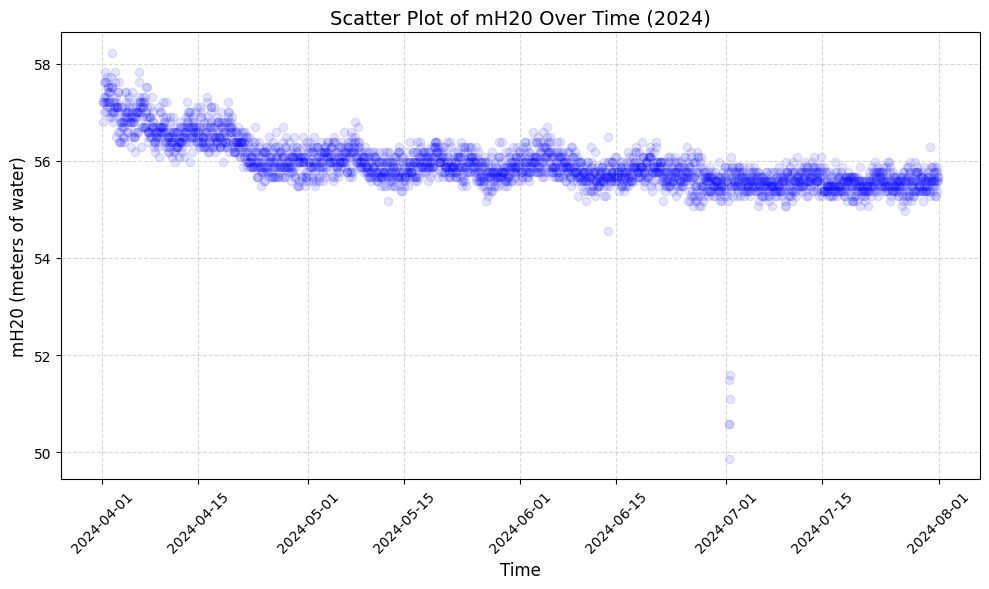

In [426]:
import matplotlib.pyplot as plt

Vatnsendi_nedri_pressure_filtered = Vatnsendi_nedri_pressure_2024.loc[start_date:end_date]
# Vatnsendi_nedri_pressure_filtered = Vatnsendi_nedri_pressure_2024


# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Vatnsendi_nedri_pressure_filtered.index, Vatnsendi_nedri_pressure_filtered["mH20"], alpha=0.1, color='blue')
plt.title("Scatter Plot of mH20 Over Time (2024)", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("mH20 (meters of water)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Input pressure

In [427]:
Vatnsendi_nedri_input_pressure = pd.read_excel('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/data/Vatnsendi-Rjupnasalir-PrePumpPressure.xlsx')
Vatnsendi_nedri_input_pressure.drop(columns=["mpoint_id","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)

Vatnsendi_nedri_input_pressure = Vatnsendi_nedri_input_pressure[Vatnsendi_nedri_input_pressure['mpoint_name'] == 'Vatnsendi - Þrýstingur aðfærslu frá Suðuræð']



# # Ensure start_time is a string (in case it's partially formatted)
# Vatnsendi_nedri_input_pressure['start_time'] = Vatnsendi_nedri_input_pressure['start_time'].astype(str)

# # Drop rows where 'start_time' only has date (missing time)
# Vatnsendi_nedri_input_pressure = Vatnsendi_nedri_input_pressure[
#     ~Vatnsendi_nedri_input_pressure['start_time'].str.match(r'^\d{4}-\d{2}-\d{2}$', na=False)
# ]

# Convert the remaining valid 'start_time' to datetime
Vatnsendi_nedri_input_pressure['start_time'] = pd.to_datetime(Vatnsendi_nedri_input_pressure['start_time'], errors='coerce')

# Set 'start_time' as index and sort
Vatnsendi_nedri_input_pressure.set_index('start_time', inplace=True)
Vatnsendi_nedri_input_pressure = Vatnsendi_nedri_input_pressure.sort_index(ascending=True)

# Clean up the DataFrame
Vatnsendi_nedri_input_pressure.drop(columns=["mpoint_name"], inplace=True)
Vatnsendi_nedri_input_pressure.rename(columns={"value":"Input mH20"}, inplace=True)
Vatnsendi_nedri_input_pressure['Input mH20'] = Vatnsendi_nedri_input_pressure['Input mH20'] * 10.197

# Display the DataFrame
Vatnsendi_nedri_input_pressure_2024 = Vatnsendi_nedri_input_pressure.loc['2024']
Vatnsendi_nedri_input_pressure_2024 = Vatnsendi_nedri_input_pressure_2024.copy()
Vatnsendi_nedri_input_pressure_2024.head()


,Input mH20
start_time,
2024-01-01 01:00:00,60.97806
2024-01-01 02:00:00,60.77412
2024-01-01 03:00:00,60.36624
2024-01-01 04:00:00,59.34654
2024-01-01 05:00:00,58.93866


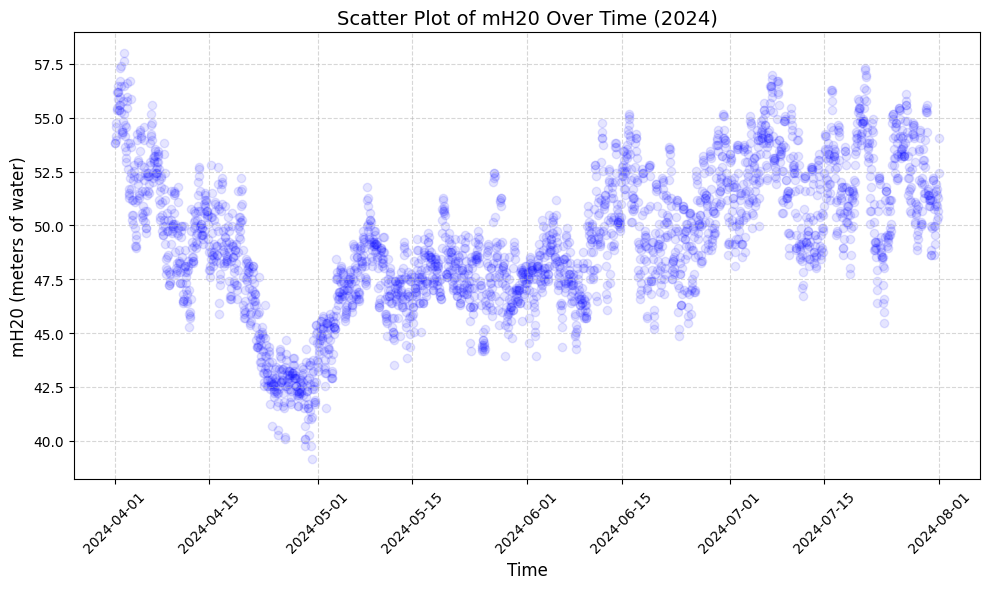

In [428]:
import matplotlib.pyplot as plt

Vatnsendi_nedri_input_pressure_filtered = Vatnsendi_nedri_input_pressure_2024.loc[start_date:end_date]
# Vatnsendi_nedri_input_pressure_filtered = Vatnsendi_nedri_input_pressure_2024



# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Vatnsendi_nedri_input_pressure_filtered.index, Vatnsendi_nedri_input_pressure_filtered["Input mH20"], alpha=0.1, color='blue')
plt.title("Scatter Plot of mH20 Over Time (2024)", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("mH20 (meters of water)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [429]:
# # Scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(Vatnsendi_nedri_input_pressure.index, Vatnsendi_nedri_input_pressure["mH20"], alpha=0.6, color='green')
# plt.title("Scatter Plot of mH20 Over Time (Input Pressure)", fontsize=14)
# plt.xlabel("Time", fontsize=12)
# plt.ylabel("mH20 (meters of water)", fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [430]:
Vatnsendi_pressure_difference = pd.DataFrame()
Vatnsendi_pressure_difference['difference in mH20'] = Vatnsendi_nedri_pressure_filtered['mH20'] - Vatnsendi_nedri_input_pressure_filtered['Input mH20']
Vatnsendi_pressure_difference.head()


,difference in mH20
start_time,
2024-04-01 01:00:00,2.95713
2024-04-01 02:00:00,3.36501
2024-04-01 03:00:00,3.26304
2024-04-01 04:00:00,3.16107
2024-04-01 05:00:00,2.44728


## Flow in lps

In [431]:
Vatnsendi_nedri_flow = pd.read_excel('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/data/H-KOP-VE-RS213.xlsx')
Vatnsendi_nedri_flow.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
Vatnsendi_nedri_flow['start_time'] = pd.to_datetime(Vatnsendi_nedri_flow['start_time'], errors='coerce')
Vatnsendi_nedri_flow.set_index('start_time',inplace=True)
Vatnsendi_nedri_flow = Vatnsendi_nedri_flow.sort_index(ascending=True)
Vatnsendi_nedri_flow_2024 = Vatnsendi_nedri_flow.loc['2024']
Vatnsendi_nedri_flow_2024 = Vatnsendi_nedri_flow_2024.copy()    
Vatnsendi_nedri_flow_2024.rename(columns={'value': 'Flæði [l/s]'}, inplace=True)
Vatnsendi_nedri_flow_2024['Flæði [l/s]'] = Vatnsendi_nedri_flow_2024['Flæði [l/s]']
# Vatnsendi_nedri_flow_2024.head()

Vatnsendi_nedri_flow_filtered = Vatnsendi_nedri_flow_2024.loc[start_date:end_date]
Vatnsendi_nedri_flow_filtered.head()

,Flæði [l/s]
start_time,
2024-04-01 01:00:00,32.67
2024-04-01 02:00:00,32.72
2024-04-01 03:00:00,33.06
2024-04-01 04:00:00,33.37
2024-04-01 05:00:00,34.21


## Energy consumption in pump

In [432]:
df_pumps = pd.read_csv('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/Vatnsendi_rjupnasalir_pumppower_modfied.csv')

df_pumps = df_pumps[['mpoint_id','start_time','value']]
df_pumps['start_time'] = pd.to_datetime(df_pumps['start_time'], errors='coerce')
df_pumps.set_index('start_time', inplace=True)
df_pumps = df_pumps.sort_index(ascending=True)
df_pumps.head()

,mpoint_id,value
start_time,,
2022-01-01,H-KOP-VE-DÆ222-PS,0.000000
2022-01-01,H-KOP-RS-DÆ212-PS,28.914787
2022-01-01,H-KOP-VE-DÆ212-PS,17.676978
2022-01-01,H-KOP-VE-DÆ213-PS,5.088386
2022-01-01,H-KOP-RS-DÆ211-PS,11.380736


In [433]:
Vatnsendi_nedri_dæla = df_pumps[df_pumps['mpoint_id'] == 'H-KOP-VE-DÆ213-PS']
Vatnsendi_nedri_dæla_2024 = Vatnsendi_nedri_dæla.loc['2024']
Vatnsendi_nedri_dæla_2024 = Vatnsendi_nedri_dæla_2024.copy()
Vatnsendi_nedri_dæla_2024.drop(columns=['mpoint_id'],inplace=True)
Vatnsendi_nedri_dæla_2024.rename(columns={'value': 'kW'}, inplace=True)
# Vatnsendi_nedri_dæla_2024.head()

Vatnsendi_nedri_dæla_filtered = Vatnsendi_nedri_dæla_2024.loc[start_date:end_date]
Vatnsendi_nedri_dæla_filtered.head()

,kW
start_time,
2024-04-01 00:00:00,4.160102
2024-04-01 01:00:00,4.030400
2024-04-01 02:00:00,4.127752
2024-04-01 03:00:00,4.094888
2024-04-01 04:00:00,4.089599


## Theoretical power

In [434]:
df_calc_eff = pd.concat([Vatnsendi_nedri_pressure_filtered,Vatnsendi_nedri_input_pressure_filtered,Vatnsendi_pressure_difference,Vatnsendi_nedri_flow_filtered,Vatnsendi_nedri_dæla_filtered],axis=1,join='outer')
df_calc_eff['Theoretical power'] = df_calc_eff['Flæði [l/s]']*(df_calc_eff['difference in mH20'])*9.81/1000
df_calc_eff.head()

,mH20,Input mH20,difference in mH20,Flæði [l/s],kW,Theoretical power
start_time,,,,,,
2024-04-01 00:00:00,NaN,NaN,NaN,NaN,4.160102,NaN
2024-04-01 01:00:00,56.79729,53.84016,2.95713,32.67,4.030400,0.947739
2024-04-01 02:00:00,57.20517,53.84016,3.36501,32.72,4.127752,1.080112
2024-04-01 03:00:00,57.20517,53.94213,3.26304,33.06,4.094888,1.058265
2024-04-01 04:00:00,57.30714,54.14607,3.16107,33.37,4.089599,1.034807


## Pump Efficiency

In [435]:
df_calc_eff['Efficiency'] = df_calc_eff['Theoretical power']/df_calc_eff['kW']
df_calc_eff.head()

,mH20,Input mH20,difference in mH20,Flæði [l/s],kW,Theoretical power,Efficiency
start_time,,,,,,,
2024-04-01 00:00:00,NaN,NaN,NaN,NaN,4.160102,NaN,NaN
2024-04-01 01:00:00,56.79729,53.84016,2.95713,32.67,4.030400,0.947739,0.235148
2024-04-01 02:00:00,57.20517,53.84016,3.36501,32.72,4.127752,1.080112,0.261671
2024-04-01 03:00:00,57.20517,53.94213,3.26304,33.06,4.094888,1.058265,0.258436
2024-04-01 04:00:00,57.30714,54.14607,3.16107,33.37,4.089599,1.034807,0.253034


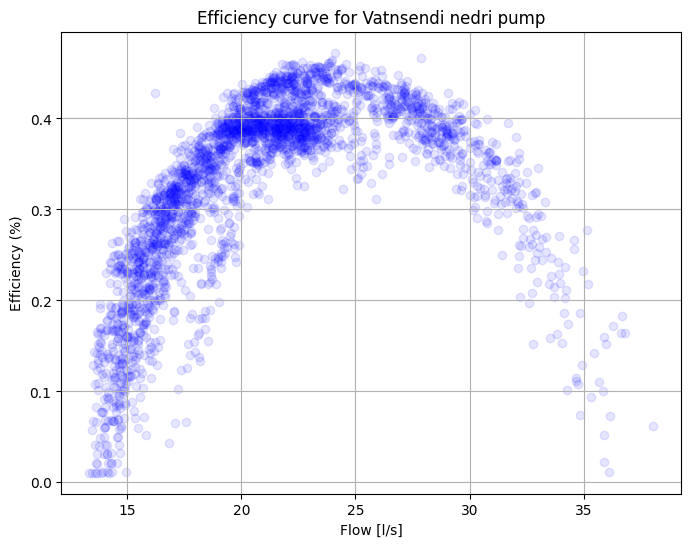

In [436]:

# Drop rows where 'Efficiency' or 'Flæði(l/s)' is NaN or zero
df_clean = df_calc_eff.dropna(subset=['Efficiency'])
df_clean = df_clean[df_clean['Efficiency'] > 0]  # Remove rows where Efficiency is 0
df_clean = df_clean[df_clean['Efficiency'] < 1.2]  # Remove rows where Efficiency is 0


# Plot Efficiency vs Flow
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Flæði [l/s]'], df_clean['Efficiency'], marker='o', color='b',alpha = 0.1)

# Adding titles and labels
plt.title('Efficiency curve for Vatnsendi nedri pump')
plt.xlabel('Flow [l/s]')
plt.ylabel('Efficiency (%)')
plt.grid(True)

# Display the plot
plt.show()

Polynomial coefficients:
  x^3: 0.00004 ± 0.00000
  x^2: -0.00501 ± 0.00034
  x^1: 0.18085 ± 0.00788
  x^0: -1.52385 ± 0.05816

R-squared: 0.80256
RMSE: 0.04357


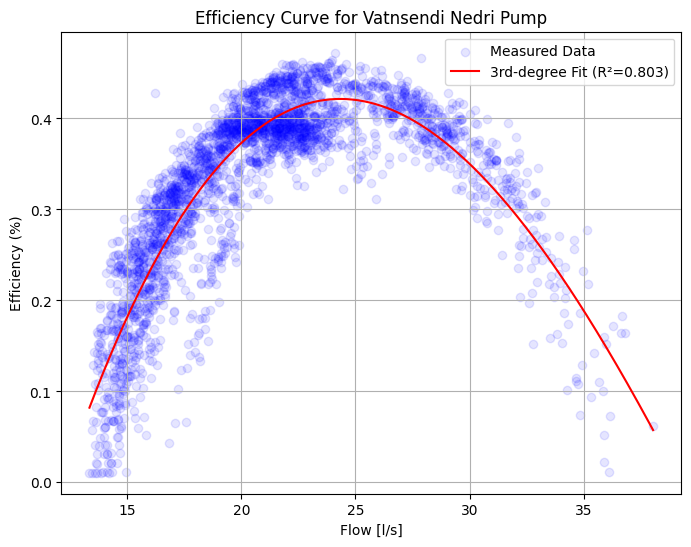

In [437]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Drop NaNs and invalid values
df_clean = df_calc_eff.dropna(subset=['Efficiency'])
df_clean = df_clean[(df_clean['Efficiency'] > 0) & (df_clean['Efficiency'] < 1.2)]

# Get x (Flow) and y (Efficiency) values
x = df_clean['Flæði [l/s]'].values
y = df_clean['Efficiency'].values

# Fit a 3rd-degree polynomial
degree = 3
coeffs, cov_matrix = np.polyfit(x, y, degree, cov=True)
p = np.poly1d(coeffs)  # Create polynomial function

# Generate smooth curve for plotting
x_fit = np.linspace(min(x), max(x), 500)
y_fit = p(x_fit)

# Compute R²
y_pred = p(x)
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Standard errors of coefficients
std_errors = np.sqrt(np.diag(cov_matrix))

# Print results
print(f"Polynomial coefficients:")
for i, (coef, err) in enumerate(zip(coeffs, std_errors)):
    print(f"  x^{degree-i}: {coef:.5f} ± {err:.5f}")

print(f"\nR-squared: {r_squared:.5f}")
print(f"RMSE: {rmse:.5f}")

# Plot data and fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(x, y, marker='o', color='b', alpha=0.1, label='Measured Data')
plt.plot(x_fit, y_fit, color='r', label=f'3rd-degree Fit (R²={r_squared:.3f})')

# Labels and title
plt.title('Efficiency Curve for Vatnsendi Nedri Pump')
plt.xlabel('Flow [l/s]')
plt.ylabel('Efficiency (%)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [438]:
def calculate_y(x):
    # The coefficients are in the form [a, b, c, d] for a cubic polynomial ax^3 + bx^2 + cx + d
    return coeffs[0]*x**3 + coeffs[1]*x**2 + coeffs[2]*x + coeffs[3]


x = 25
y = calculate_y(x)
print(f"Theoretical Efficiency at {x} l/s: {y:.5f}")

Theoretical Efficiency at 25 l/s: 0.42038
